Cambios en con crecimiento exponencial y logistico

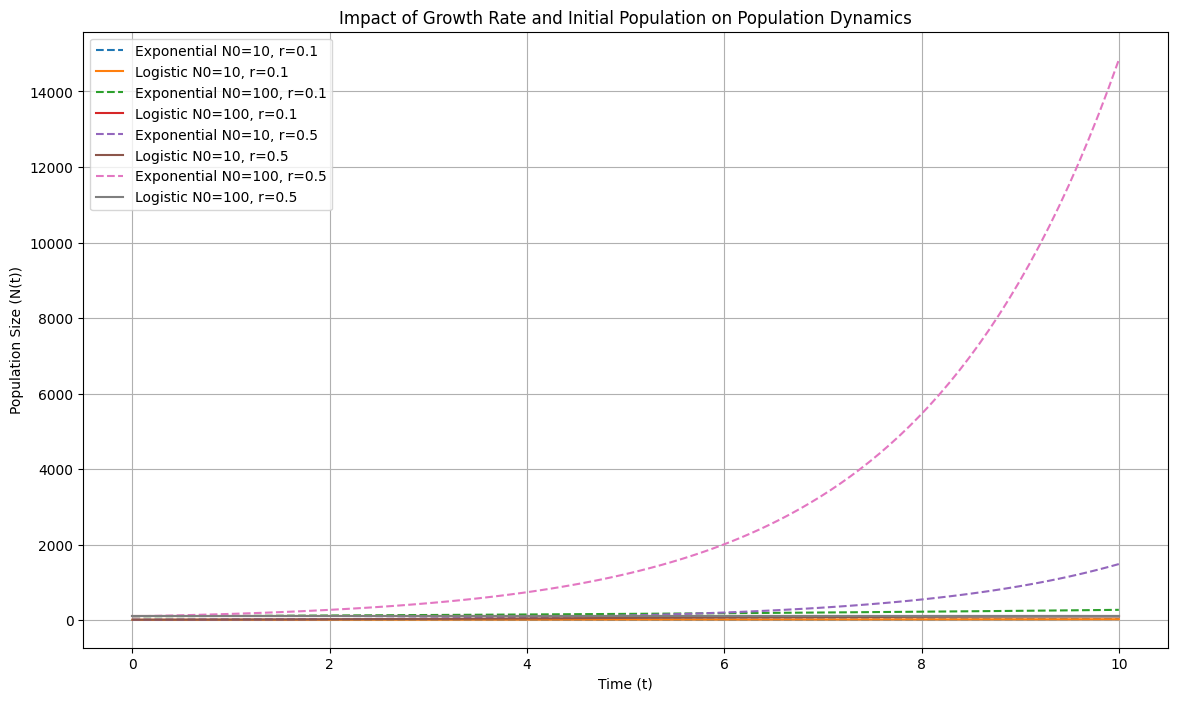

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_growth(N0, r, t):
    return N0 * np.exp(r * t)

def logistic_growth(N0, r, K, t):
    return (K * N0 * np.exp(r * t)) / (K + N0 * (np.exp(r * t) - 1))

# Time range and carrying capacity K for logistic growth
t = np.linspace(0, 10, 100)
K = 100  # Carrying capacity

# Scenarios with different r and N0
scenarios = [
    {'N0': 10, 'r': 0.1, 'label': 'N0=10, r=0.1'},
    {'N0': 100, 'r': 0.1, 'label': 'N0=100, r=0.1'},
    {'N0': 10, 'r': 0.5, 'label': 'N0=10, r=0.5'},
    {'N0': 100, 'r': 0.5, 'label': 'N0=100, r=0.5'}
]

# Plotting
plt.figure(figsize=(14, 8))

for scenario in scenarios:
    exp_growth = exponential_growth(scenario['N0'], scenario['r'], t)
    log_growth = logistic_growth(scenario['N0'], scenario['r'], K, t)
    
    plt.plot(t, exp_growth, '--', label=f'Exponential {scenario["label"]}')
    plt.plot(t, log_growth, '-', label=f'Logistic {scenario["label"]}')

plt.title('Impact of Growth Rate and Initial Population on Population Dynamics')
plt.xlabel('Time (t)')
plt.ylabel('Population Size (N(t))')
plt.legend()
plt.grid(True)
plt.show()


Cambios en la exponencial con R > 0 y R < 0

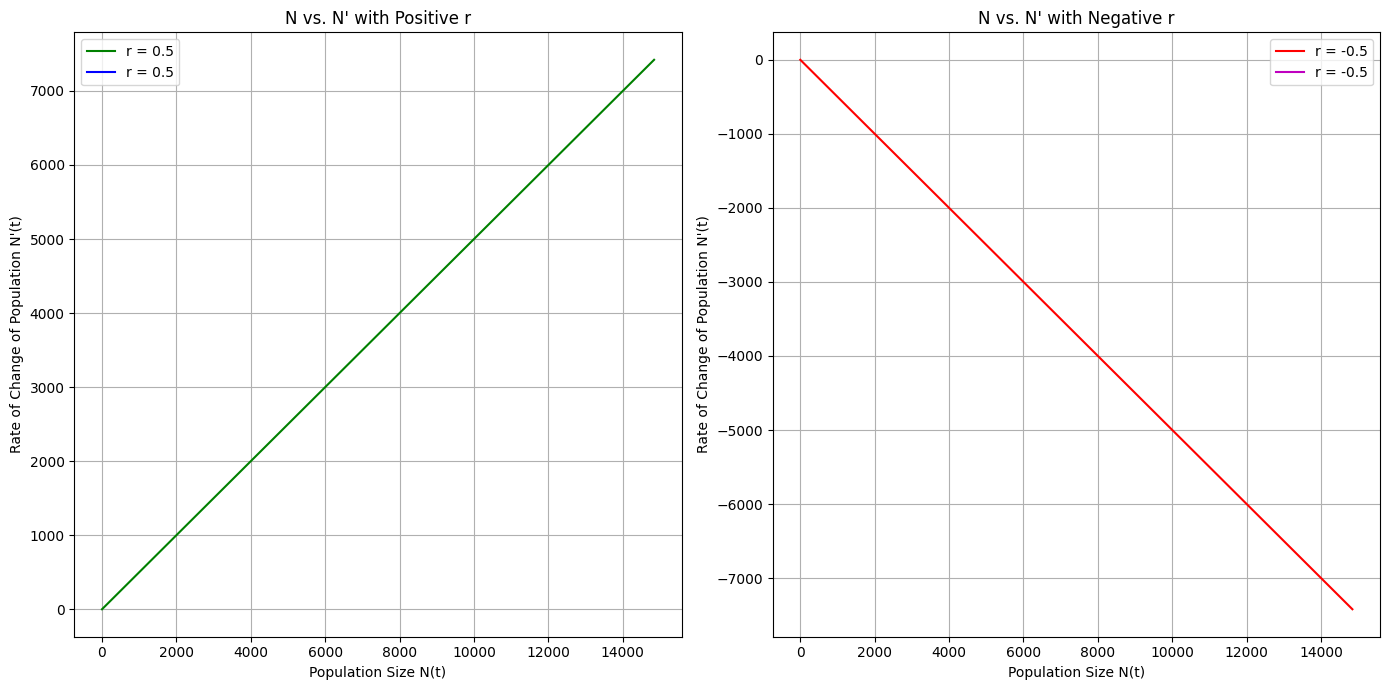

In [8]:
def exponential_growth_derivative(N0, r, t):
    return r * N0 * np.exp(r * t)

def logistic_growth_derivative(N0, r, K, t):
    return (r * K * N0 * np.exp(r * t)) / (K + N0 * (np.exp(r * t) - 1)) - (K * r * N0 * np.exp(r * t) * np.exp(r * t)) / (K + N0 * (np.exp(r * t) - 1))**2

# Time range for visualization
t = np.linspace(-10, 10, 100)

# Parameters for scenarios
r_positive = 0.5
r_negative = -0.5
N0 = 100
K = 10

# Calculate N and N' for positive r
N_exp_positive = exponential_growth(N0, r_positive, t)
N_prime_exp_positive = exponential_growth_derivative(N0, r_positive, t)

N_log_positive = logistic_growth(N0, r_positive, K, t)
N_prime_log_positive = logistic_growth_derivative(N0, r_positive, K, t)

# Calculate N and N' for negative r
N_exp_negative = exponential_growth(N0, r_negative, t)
N_prime_exp_negative = exponential_growth_derivative(N0, r_negative, t)

N_log_negative = logistic_growth(N0, r_negative, K, t)
N_prime_log_negative = logistic_growth_derivative(N0, r_negative, K, t)

# Plotting N vs N'
plt.figure(figsize=(14, 7))

# Plot for positive r
plt.subplot(1, 2, 1)
plt.plot(N_exp_positive, N_prime_exp_positive, 'g-', label=f'r = {r_positive}')
plt.plot(N_log_positive, N_prime_log_positive, 'b-', label=f'r = {r_positive}')
plt.title('N vs. N\' with Positive r')
plt.xlabel('Population Size N(t)')
plt.ylabel("Rate of Change of Population N'(t)")
plt.grid(True)
plt.legend()

# Plot for negative r
plt.subplot(1, 2, 2)
plt.plot(N_exp_negative, N_prime_exp_negative, 'r-', label=f'r = {r_negative}')
plt.plot(N_log_negative, N_prime_log_negative, 'm-', label=f'r = {r_negative}')
plt.title('N vs. N\' with Negative r')
plt.xlabel('Population Size N(t)')
plt.ylabel("Rate of Change of Population N'(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

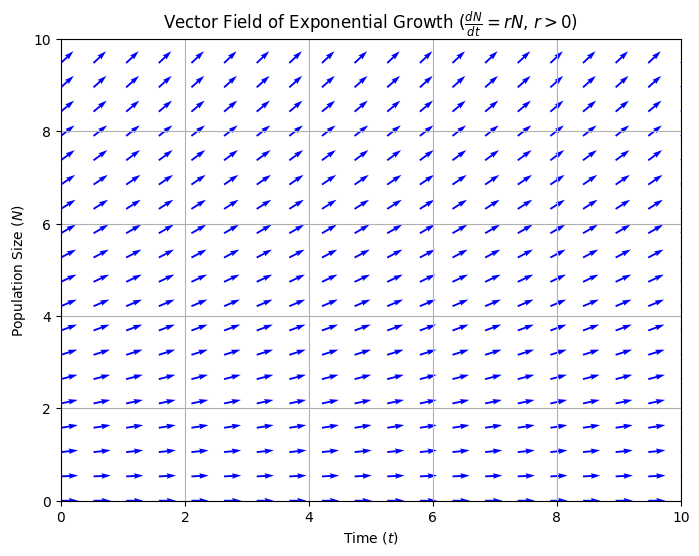

In [5]:

# Parameters for the vector field
r = 0.1  # Growth rate
N_max = 10  # Maximum population size for the plot
t_max = 10  # Maximum time for the plot

# Create a grid of t and N values
t, N = np.meshgrid(np.linspace(0, t_max, 20), np.linspace(0, N_max, 20))

# The change in N and t (dt is always 1 for visualization, dN/dt = rN)
dt = np.ones_like(t)
dN = r * N

# Normalize vectors for uniform appearance
norm = np.sqrt(dt**2 + dN**2)
dt /= norm
dN /= norm

# Creating the vector field plot
plt.figure(figsize=(8, 6))
plt.quiver(t, N, dt, dN, color='blue')
plt.xlabel('Time ($t$)')
plt.ylabel('Population Size ($N$)')
plt.title('Vector Field of Exponential Growth ($\\frac{dN}{dt} = rN$, $r > 0$)')
plt.xlim([0, t_max])
plt.ylim([0, N_max])
plt.grid(True)
plt.show()



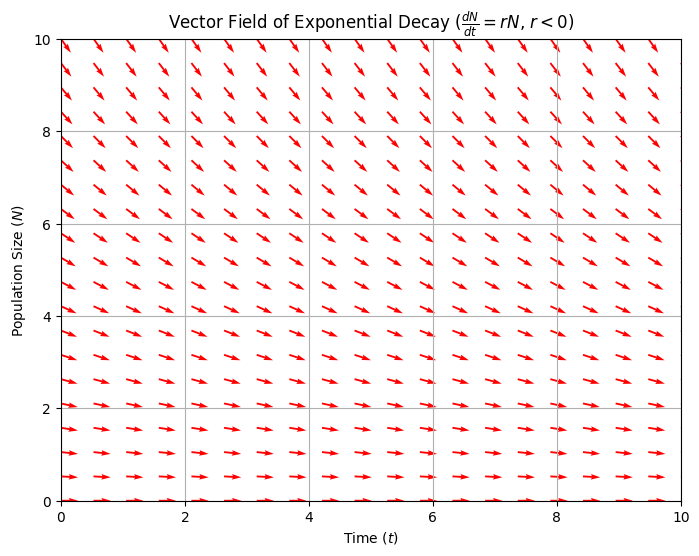

In [6]:
# Adjust the parameter for decay
r_decay = -0.1  # Negative growth rate for decay

# The change in N with r < 0
dN_decay = r_decay * N

# Normalize vectors for uniform appearance in the decay scenario
norm_decay = np.sqrt(dt**2 + dN_decay**2)
dt_decay = dt / norm_decay
dN_decay /= norm_decay

# Creating the vector field plot for decay
plt.figure(figsize=(8, 6))
plt.quiver(t, N, dt_decay, dN_decay, color='red')
plt.xlabel('Time ($t$)')
plt.ylabel('Population Size ($N$)')
plt.title('Vector Field of Exponential Decay ($\\frac{dN}{dt} = rN$, $r < 0$)')
plt.xlim([0, t_max])
plt.ylim([0, N_max])
plt.grid(True)
plt.show()
